In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Flatten,Dense,Dropout
from keras.layers.convolutional import Convolution2D,MaxPooling2D,ZeroPadding2D
from keras.optimizers import SGD
import cv2

In [ ]:
!tar -xf /content/drive/My\ Drive/fer2013.tar.gz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#PARAMETERS
X_train,train_y,X_test,test_y = [], [], [],[]
print("ready")

ready


In [ ]:
df = pd.read_csv("/content/fer2013/fer2013.csv")
print("ready")

ready


In [ ]:
for index, row in df.iterrows():
  val=row['pixels'].split(" ")
  try:
    if "Training" in row["Usage"]:
      X_train.append(np.array(val,"float32"))
      train_y.append(row["emotion"])
    elif "PublicTest" in row["Usage"]:
        X_test.append(np.array(val,"float32"))
        test_y.append(row["emotion"])
  except:
    print(f"error ocurred at index :{index} and row:{row}")
#X_train.size
#print(f"X train is :{X_train.size} samples")
print(f"X_Train size is :{len(X_train)}")
print(f"train_y size is :{len(train_y)}")
print(f"X_Test size is :{len(X_test)}")
print(f"test_y size is :{len(test_y)}")
print("ready")

X_Train size is :28709
train_y size is :28709
X_Test size is :3589
test_y size is :3589
ready


In [ ]:
num_features=64
num_labels=7
batch_size =64
epochs =100
width, heigth = 48,48
print("ready")

ready


In [ ]:
X_train = np.array(X_train, 'float32')
train_y = np.array(train_y, 'float32')

X_test = np.array(X_test, 'float32')
test_y = np.array(test_y, 'float32')
print("ready")

ready


In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
train_y = to_categorical(train_y,num_classes=num_labels)
test_y = to_categorical(test_y, num_classes=num_labels)
print("ready")

ready


In [ ]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0],48,48,1)

X_test = X_test.reshape(X_test.shape[0],48,48,1)

print("ready")

ready


In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow import keras
print("ready")


ready


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#2nd convolution layer+
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))



#3rd convolution layer
model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

#fully connected neural network

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels,activation="softmax"))

#model.summary()
print("ready")


ready


In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer ='sgd',
              metrics=['accuracy'])

In [ ]:
history= model.fit(X_train,train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,test_y),
          shuffle=True)

Epoch 1/100
449/449 [==============================] - 19s 43ms/step - loss: 1.7948 - accuracy: 0.2493 - val_loss: 1.7968 - val_accuracy: 0.2508
Epoch 2/100
449/449 [==============================] - 19s 41ms/step - loss: 1.7822 - accuracy: 0.2549 - val_loss: 1.7835 - val_accuracy: 0.2508
Epoch 3/100
449/449 [==============================] - 18s 41ms/step - loss: 1.7711 - accuracy: 0.2601 - val_loss: 1.7844 - val_accuracy: 0.2552
Epoch 4/100
449/449 [==============================] - 18s 40ms/step - loss: 1.7565 - accuracy: 0.2760 - val_loss: 1.7524 - val_accuracy: 0.2756
Epoch 5/100
449/449 [==============================] - 18s 40ms/step - loss: 1.7325 - accuracy: 0.2966 - val_loss: 1.7036 - val_accuracy: 0.3065
Epoch 6/100
449/449 [==============================] - 18s 41ms/step - loss: 1.7007 - accuracy: 0.3205 - val_loss: 1.6805 - val_accuracy: 0.3171
Epoch 7/100
449/449 [==============================] - 18s 40ms/step - loss: 1.6741 - accuracy: 0.3354 - val_loss: 1.6530 - val_ac

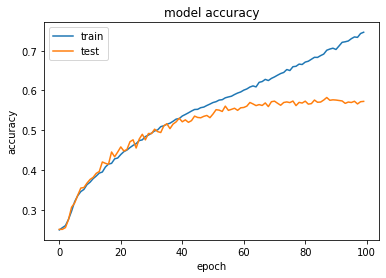

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

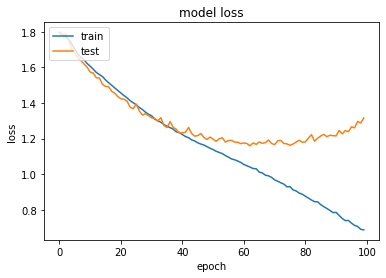

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()